# Calculate optimal 2 by 2 with 15 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [2]:
cell_size = [2, 2]
#test = Subgraphs(angles=[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180],
#                      lengths=[1], compute_beam_lengths=True, lengths_cell_size=cell_size)

prefill replay memory
start training
 new max record arrange grid:  3.5775
 new max record arrange grid:  3.6475
   10 mean training reward:  3.34
 new max record arrange grid:  3.8075
   20 mean training reward:  3.18
   30 mean training reward:  3.27
 new max record arrange grid:  3.8200000000000003
   40 mean training reward:  3.35
   50 mean training reward:  3.18
   60 mean training reward:  3.18
 new max record arrange grid:  4.0075
   70 mean training reward:  3.38
   80 mean training reward:  3.30
   90 mean training reward:  3.32
  100 mean training reward:  3.25
  110 mean training reward:  3.19
  120 mean training reward:  3.41
 new max record arrange grid:  4.045
  130 mean training reward:  3.28
  140 mean training reward:  3.13
  150 mean training reward:  3.18
  160 mean training reward:  3.25
  170 mean training reward:  3.24
  180 mean training reward:  3.35
  190 mean training reward:  3.33
  200 mean training reward:  3.31
  210 mean training reward:  3.17
  220 mean

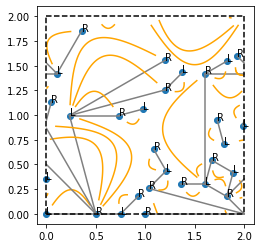

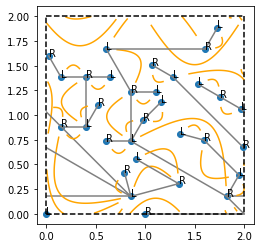

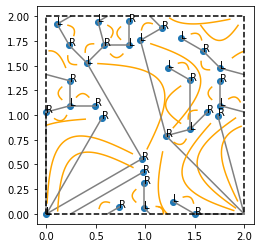

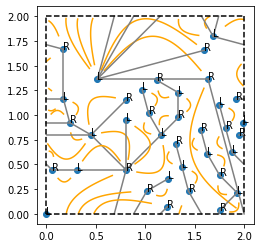

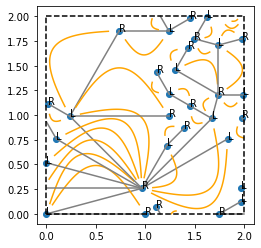

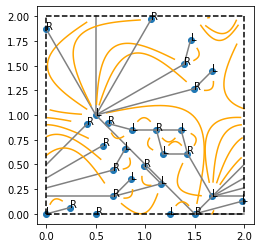

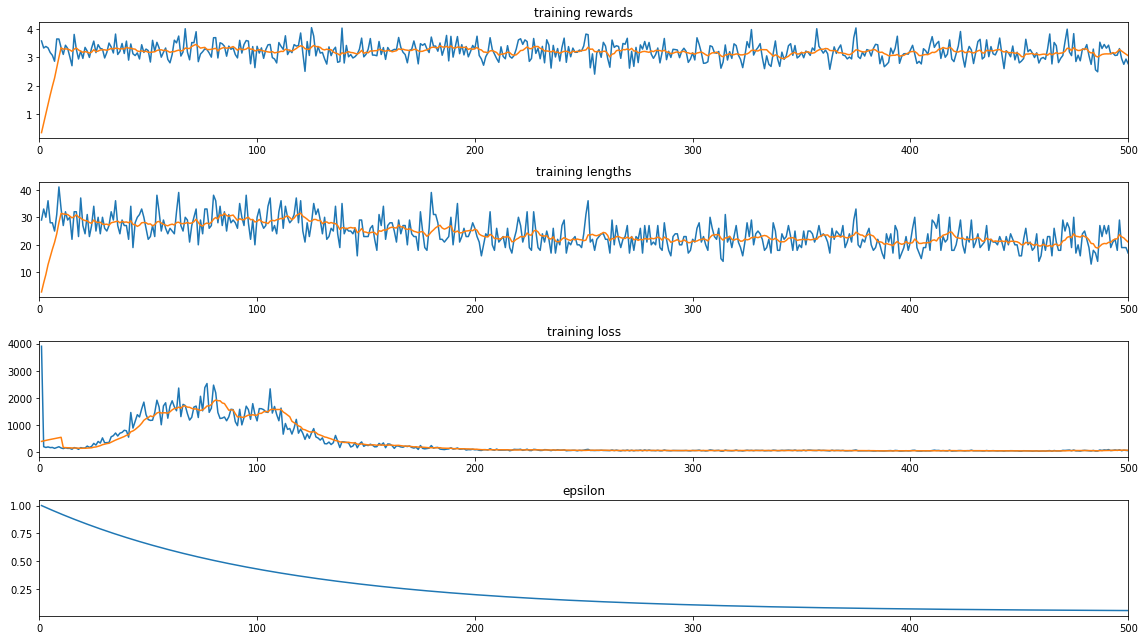

[3.5775, 3.5775, 3.6475, 3.6475, 3.8075, 3.8075, 3.8200000000000003, 3.8200000000000003, 4.0075, 4.0075, 4.045, 4.045]
[1, 8, 8, 16, 16, 35, 35, 67, 67, 125, 125, 500]


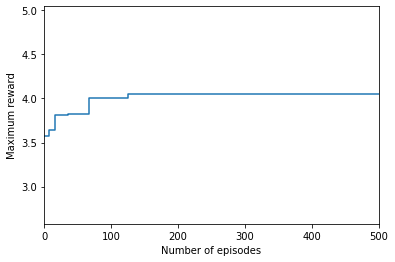

In [3]:
cell_size = [2, 2]
# we start from scratch here
subgraphs = Subgraphs(angles=[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180],
                      lengths=[1], compute_beam_lengths=True, lengths_cell_size=cell_size)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=cell_size[0] + 1,
                           n_cells_y=cell_size[1] + 1,
                           subgraphs=subgraphs)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=28, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

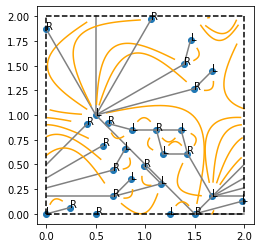

In [4]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [5]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

In [6]:
max(agent.rewards)

4.045

In [7]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)

In [8]:
load_agent.get_graph_state()

array([[1., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])